首先是导入MerkleTree

In [1]:
from MerkleTree import *
import random

导入成功之后，我们可以构建一棵最基本的树~

INFO: 构建了个寂寞


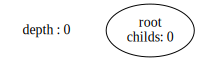

In [2]:
# 构建一颗Merkle树
mt = MerkleTree()

# 构建数据 -> nodeData
nodeData = []

# 构建一棵树，方法选择 imbalance
mt.build_merkle_tree(nodeData, way='imbalance')

# 展示
mt.show()

这里我们看到，我们初始化来了一棵最基本的树（或树桩），左侧显示的是这棵树的高度    
我们其实可以向这棵树中添加数据，如下所示

INFO: 节点构造完成： Node(value=87, prime=751, hash=8ba64a78b0d5bc4e9833eca2c258c88bf56b7ca91becdccb4ae457405b2f7b5a)


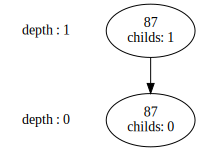

In [3]:
# 随机构建一个数据
num = random.randint(1,99)

# 添加到树中
mt.add(str(num))

# 展示
mt.show()

INFO: 节点构造完成： Node(value=61, prime=937, hash=017030104091df0e93dfd4c2623a113b1c9b18533eebb004bbd01a1b9e3a4336)
INFO: 节点构造完成： Node(value=54, prime=307, hash=39a9241e470189d047c6421bad74c848d8e3a7e23a50782ee8cb10667c582276)
INFO: 节点构造完成： Node(value=8, prime=691, hash=f759365454f2e692594140ecc8ab656dd3b4632c3c94f1480dbb620798d25fd6)
INFO: 节点构造完成： Node(value=91, prime=881, hash=6a9311260d3c1011c242379529f397c5fed2a358bc30bf21bc8632134519ada2)
INFO: 节点构造完成： Node(value=86, prime=853, hash=646309c9c821af1035ae5753c913d1688027d7916f5731b2d9c17a5dcfc9e10f)
INFO: 节点构造完成： Node(value=15, prime=719, hash=8a29e7657ddd3df504be7f86a2b9436c2549fdb6d80c691214d569050ff72442)
INFO: 节点构造完成： Node(value=76, prime=863, hash=45c902c7801bac11c5a8acffa62126dc3e1fa1ca3a951e7c684053d03ba4a348)
INFO: 节点构造完成： Node(value=83, prime=311, hash=38d6151942fe5252a944214c153eb07bd41b5ce76840d20f92e5e4096e734f26)
INFO: 节点构造完成： Node(value=39, prime=107, hash=2c41fbc874a0824eaae1e42e801e83992f87fd2f0d25b1b979a22eba83cb6552)
IN

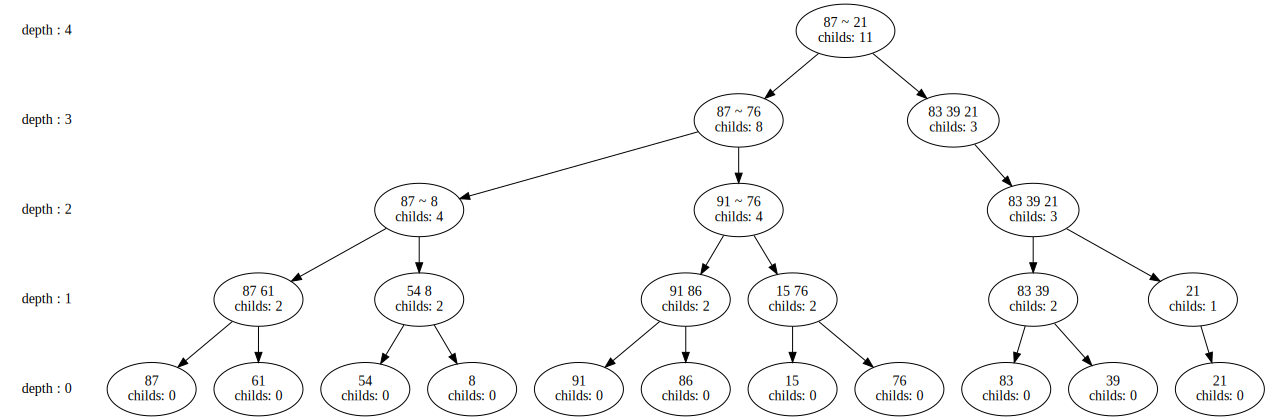

In [4]:
# 多添加一些节点，构造 10 个节点
for _ in range(10):
    num = random.randint(1,99)
    mt.add(str(num))

# 展示
mt.show()

我们看到了，一棵“枝繁叶茂”的树，我们可以在树中标记出新增的节点  
最近一次新增加的节点使用红色进行标注 

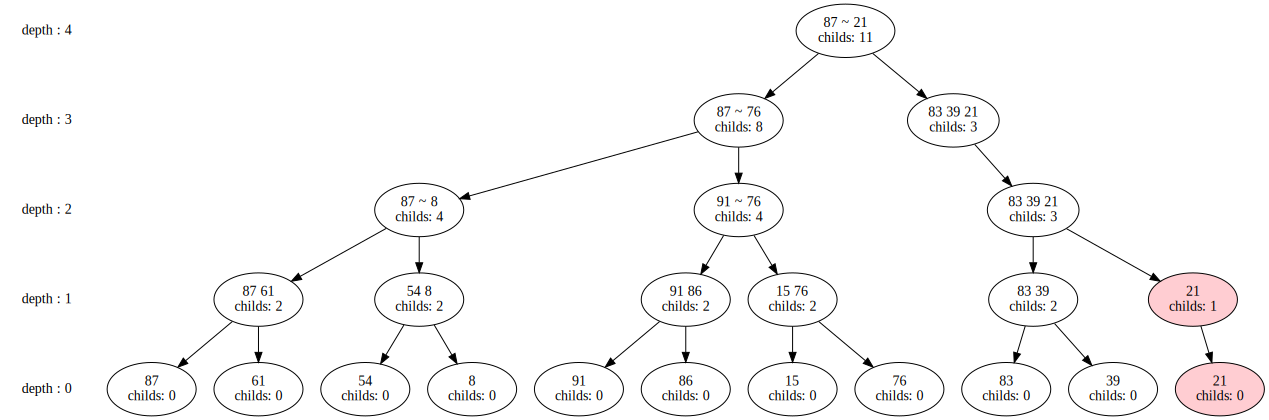

In [5]:
mt.compare()

新增加的节点在树的最右边

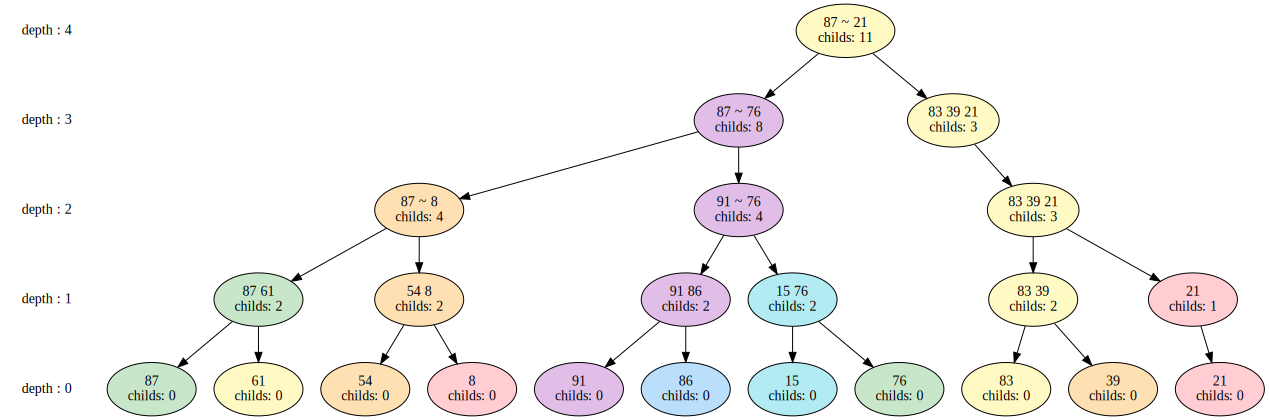

In [6]:
# 显示每一次添加节点的情况，纵向颜色相同的 代表是同一代
mt.compare(showHistory=True)

通过不断地增加节点，我们就可以拥有一棵很茂盛的树    
有时是我们会在这棵树上进行查询的工作，有两个方面：
- 证明一个数据是不是存在
- 证明一个数据是不是不在

分析：
本科学习密码学的时候接触到了 RSA。其中，安全性的关键在于 大素数 $P$ 的因数分解    
我们想要验证一个数是不是这个 $P$ 的因数，很容易；但是想要拆分出这个大素数的所有因数是很困难的。 
所以，我就想使用这个方法：
- 为每一个 “叶子” 随机生成一个素数
- 自下而上的，父节点的 “数” 为子节点 “数” 的乘积。

PS：上一回使用这个思路是在做 **Leetcode 49. 字母异位词分组** 的时候

In [7]:
# 获取整棵树所有数据自己的素数id
mt.getTreePrime()

['751', '937', '307', '691', '881', '853', '719', '863', '311', '107', '269']

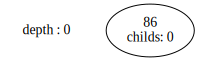

In [8]:
# 根据知道的素数id 就可以
mynode, proofPath = mt.search(mt.getTreePrime()[5])

# 展示
mt.show(mynode)

proofPath 变量中存放着证明这个节点真实存在的 **Merkle 路径**

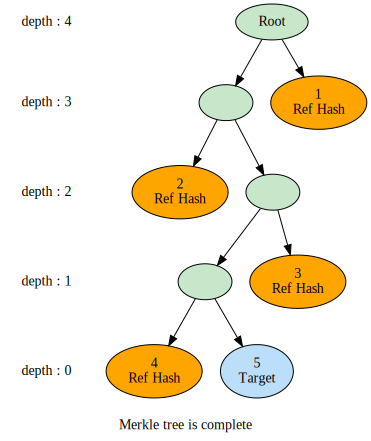

In [9]:
# 验证一下水电费
mt.merkle_path(proofPath)

颜色解释：
- 橙色：表示需要提供给 “请求者” 的作证 hash 值
- 蓝色：“请求者” 想要证明存在的节点
- 绿色：hash 值验证成功的节点

当我们将橙色的节点们发送给 “请求者” 的时候，可能会遇到 数据被篡改 的情况。  
这时候，我们可以再次验证

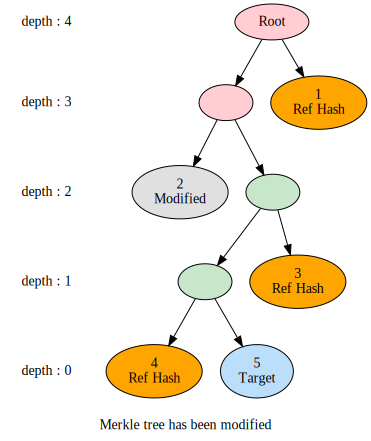

In [10]:
# 篡改第 3 号节点的 hash 数据
proofPath_2 = mt.tampering_test(proofPath,2)

# 验证一下
mt.merkle_path(proofPath_2)

当树中的数据不再需要的时候，留着它会占用位置，但是如果删除掉其中某个数据，再重新建树，需要计算大量的hash运算    
为了避免这个问题，我们这棵树可以删除需要删除的节点

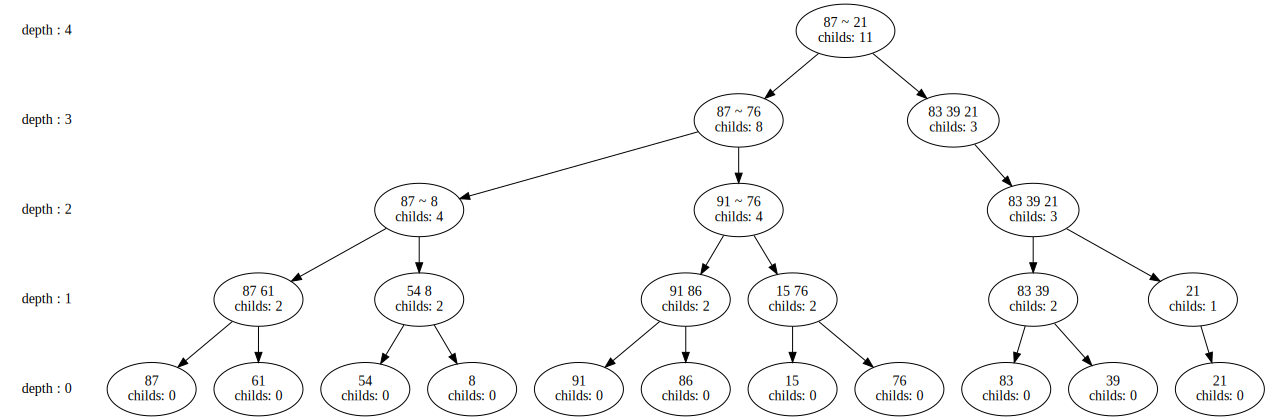

In [11]:
# 首先我们先看一下目前这棵树的样子
mt.show(string='')

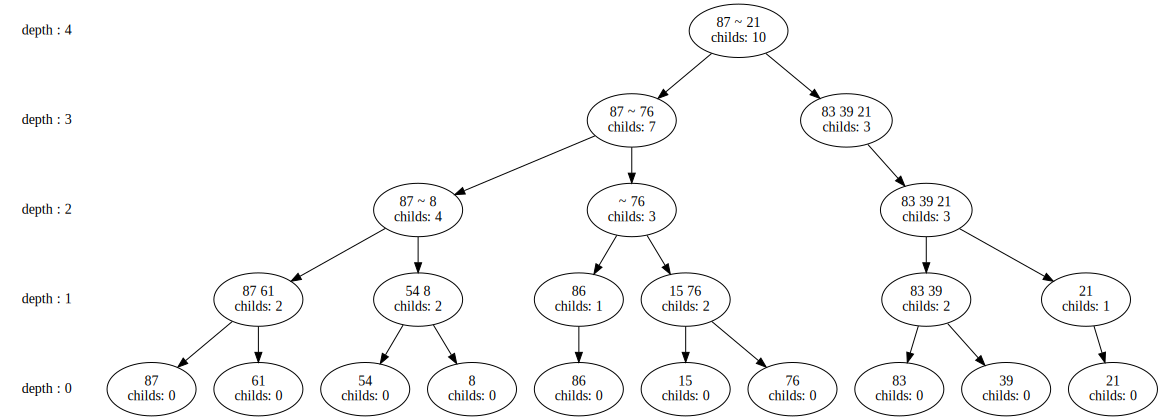

In [12]:
# 删除这棵树的一个节点
mt.remove(mt.getTreePrime()[4])
mt.show()

删除操作之后的，我们看到了第4个节点已经被删除了   
我们还可以继续进行删除或者添加节点

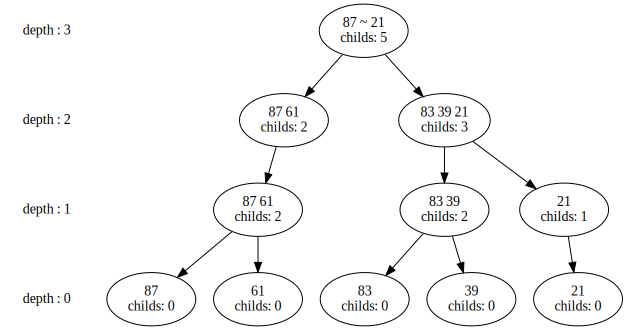

In [13]:
# 连续五次删除第3个节点
for i in range(5):
    mt.remove(mt.getTreePrime()[2])
mt.show()

删除之后的树看起来不是那么茂盛了    
我们可以继续添加 “叶子”

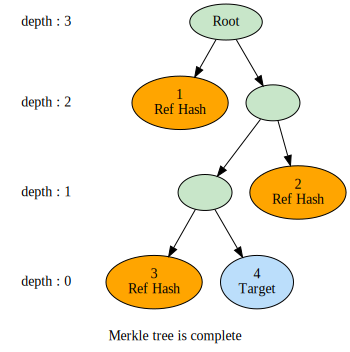

In [14]:
mynode, proofPath = mt.search(mt.getTreePrime()[3])
mt.merkle_path(proofPath)